# Multiple Stocks

将多只股票数据读取到一个 dataframe 中需要：

-使用 pandas.date_range 指定一组日期

    创建一个空的 dataframe，并用日期表示索引
        这样有助于匹配股票数据并且按照交易日期排序
    读取一个参考股票（例如 SPY），并使用 pandas.DataFrame.dropna 删除非交易日期
    -使用 pandas.DataFrame.join 渐进地连接dataframe

读取多只股票后，你可以：

    按照股票代号选择股票子集
    按照行（日期）和列（代号）进行切片
    同时绘制多只股票的图形（依然使用 pandas.DataFrame.plot）
    对多只股票进行算术运算，例如按照第一天的股价标准化数据


In [1]:
import pandas as pd

# Define date range
start_date ='2010-01-22'
end_date = '2010-01-26'
dates = pd.date_range(start_date,end_date)
print(dates)

DatetimeIndex(['2010-01-22', '2010-01-23', '2010-01-24', '2010-01-25',
               '2010-01-26'],
              dtype='datetime64[ns]', freq='D')


In [2]:
print(dates[0])

2010-01-22 00:00:00


In [3]:
# Create an empty dataframe
df1 = pd.DataFrame(index=dates)

In [4]:
# Read SPY data into temporary dataframe
dfSPY = pd.read_csv("Data/SPY.csv", index_col="Date", parse_dates=True, usecols=['Date','Adj Close'], na_values=['nan'])

# Rename 'Adj Close' column to 'SPY' to prevent clash
dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
print(dfSPY.head())

                  SPY
Date                 
1993-01-29  26.836645
1993-02-01  27.027504
1993-02-02  27.084740
1993-02-03  27.371080
1993-02-04  27.485609


In [5]:
# Join the two dataframes using DataFrame.join()
df1 = df1.join(dfSPY, how='inner')
print(df1)

                  SPY
2010-01-22  90.708870
2010-01-25  91.173965
2010-01-26  90.791885


In [6]:
## Read in more stocks
symbols = ['GOOG', 'IBM', 'AAPL', 'GLD']
for symbol in symbols:
    df_temp = pd.read_csv("Data/{}.csv".format(symbol), index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': symbol})
    df1 = df1.join(df_temp)
print(df1)

                  SPY        GOOG        IBM       AAPL         GLD
2010-01-22  90.708870  273.227905  94.088844  18.837185  107.169998
2010-01-25  91.173965  268.255249  94.553688  19.343958  107.480003
2010-01-26  90.791885  269.457428  94.276276  19.617346  107.559998


## Useful Functions

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
# Define date range
start_date ='2010-01-01'
end_date = '2012-12-31'
dates = pd.date_range(start_date,end_date)

def symbol_to_path(symbol, base_dir='Data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference. if absent 
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date', parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':
            df = df.dropna(subset=['SPY'])
    return df

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

symbols = ['GOOG', 'IBM', 'AAPL', 'GLD']
data = get_data(symbols,dates)
print(data.head())
print(data.tail())

                  SPY        GOOG        IBM       AAPL         GLD
2010-01-04  94.130867  311.349976  99.299347  20.386072  109.800003
2010-01-05  94.380074  309.978882  98.099792  20.421322  109.699997
2010-01-06  94.446495  302.164703  97.462532  20.096491  111.510002
2010-01-07  94.845207  295.130463  97.125160  20.059338  110.820000
2010-01-08  95.160805  299.064880  98.099792  20.192701  111.370003
                   SPY        GOOG         IBM       AAPL         GLD
2012-12-24  125.814247  352.457611  152.007126  52.757809  160.619995
2012-12-26  125.283943  352.144653  151.651642  52.030602  160.779999
2012-12-27  125.115967  350.862976  152.252060  52.239540  161.160004
2012-12-28  123.763733  347.743256  149.976685  51.684753  160.539993
2012-12-31  125.867302  351.404449  151.335571  53.974899  162.020004


## Choose Data using Slicing

In [8]:
print(data.loc['2010-01-01':'2010-01-31'])

                  SPY        GOOG         IBM       AAPL         GLD
2010-01-04  94.130867  311.349976   99.299347  20.386072  109.800003
2010-01-05  94.380074  309.978882   98.099792  20.421322  109.699997
2010-01-06  94.446495  302.164703   97.462532  20.096491  111.510002
2010-01-07  94.845207  295.130463   97.125160  20.059338  110.820000
2010-01-08  95.160805  299.064880   98.099792  20.192701  111.370003
2010-01-11  95.293701  298.612823   97.072685  20.014568  112.849998
2010-01-12  94.404961  293.332153   97.844872  19.786903  110.489998
2010-01-13  95.202347  291.648102   97.634964  20.066006  111.540001
2010-01-14  95.459831  293.019196   99.194389  19.949797  112.029999
2010-01-15  94.388382  288.126007   98.797028  19.616390  110.860001
2010-01-19  95.567795  291.911407  100.566330  20.484186  111.519997
2010-01-20  94.596008  288.329681   97.649979  20.168890  108.940002
2010-01-21  92.777000  289.606384   96.712860  19.820242  107.370003
2010-01-22  90.708870  273.227905 

In [9]:
print(data['GOOG'].tail())
print(data[['IBM', 'GLD']].tail())

2012-12-24    352.457611
2012-12-26    352.144653
2012-12-27    350.862976
2012-12-28    347.743256
2012-12-31    351.404449
Name: GOOG, dtype: float64
                   IBM         GLD
2012-12-24  152.007126  160.619995
2012-12-26  151.651642  160.779999
2012-12-27  152.252060  161.160004
2012-12-28  149.976685  160.539993
2012-12-31  151.335571  162.020004


## Plot Data

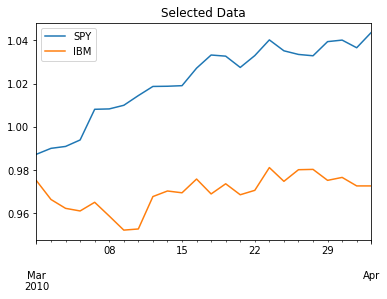

In [20]:
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!    
    plot_data(df.loc[start_index:end_index, columns],title="Selected Data")
    
def normalize_data(df):
    return df/df.iloc[0,:]
plot_selected(normalize_data(data), ['SPY', 'IBM'], '2010-03-01', '2010-04-01')